# Detecção de Fraude

#### Importando a Base

In [1]:
import pandas as pd 

dados = pd.read_csv('fraud_dataset_example.csv',sep=',')
dados.head(10)

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815      170136.00       160296.36   
1     1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2     1  TRANSFER    181.00  C1305486145         181.00            0.00   
3     1  CASH_OUT    181.00   C840083671         181.00            0.00   
4     1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
5     1   PAYMENT   7817.71    C90045638       53860.00        46042.29   
6     1   PAYMENT   7107.77   C154988899      183195.00       176087.23   
7     1   PAYMENT   7861.64  C1912850431      176087.23       168225.59   
8     1   PAYMENT   4024.36  C1265012928        2671.00            0.00   
9     1     DEBIT   5337.77   C712410124       41720.00        36382.23   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0            0.00        0               0  
1  M2044282225             0.0            0.00        0               0  
2   C553264065             0.0            0.00        1               0  
3    C38997010         21182.0            0.00        1               0  
4  M1230701703             0.0            0.00        0               0  
5   M573487274             0.0            0.00        0               0  
6   M408069119             0.0            0.00        0               0  
7   M633326333             0.0            0.00        0               0  
8  M1176932104             0.0            0.00        0               0  
9   C195600860         41898.0        40348.79        0               0

#### Conhecendo os Dados

In [3]:
#dados.isnull().sum()
dados.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [21]:
dados.describe().T

count          mean           std   min       25%  \
Fraude            101613.0  1.141586e-03  3.376824e-02  0.00      0.00   
super_fraude      101613.0  0.000000e+00  0.000000e+00  0.00      0.00   
tempo             101613.0  8.523457e+00  1.820681e+00  1.00      8.00   
valor             101613.0  1.740901e+05  3.450199e+05  0.32  10016.59   
saldo_inicial_c1  101613.0  9.071753e+05  2.829575e+06  0.00      0.00   
novo_saldo_c1     101613.0  9.234992e+05  2.867319e+06  0.00      0.00   
saldo_inicial_c2  101613.0  8.810428e+05  2.399949e+06  0.00      0.00   
novo_saldo_c2     101613.0  1.183998e+06  2.797761e+06  0.00      0.00   

                       50%         75%          max  
Fraude                0.00        0.00         1.00  
super_fraude          0.00        0.00         0.00  
tempo                 9.00       10.00        10.00  
valor             53385.41   212498.40  10000000.00  
saldo_inicial_c1  20190.47   194715.00  38939424.03  
novo_saldo_c1         0.00   219217.76  38946233.02  
saldo_inicial_c2  21058.00   591921.70  34008736.98  
novo_saldo_c2     51783.43  1063121.64  38946233.02

In [7]:
dados['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [12]:
dados.shape

(101613, 11)

In [15]:
dados.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [26]:
dados.groupby('Fraude').tempo.count()

Fraude
0    101497
1       116
Name: tempo, dtype: int64

#### Manipulando a Base

In [17]:
dados = dados[['isFraud', 
       'isFlaggedFraud','step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]
dados.head(10)

isFraud  isFlaggedFraud  step      type    amount     nameOrig  \
0        0               0     1   PAYMENT   9839.64  C1231006815   
1        0               0     1   PAYMENT   1864.28  C1666544295   
2        1               0     1  TRANSFER    181.00  C1305486145   
3        1               0     1  CASH_OUT    181.00   C840083671   
4        0               0     1   PAYMENT  11668.14  C2048537720   
5        0               0     1   PAYMENT   7817.71    C90045638   
6        0               0     1   PAYMENT   7107.77   C154988899   
7        0               0     1   PAYMENT   7861.64  C1912850431   
8        0               0     1   PAYMENT   4024.36  C1265012928   
9        0               0     1     DEBIT   5337.77   C712410124   

   oldbalanceOrg  newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  
0      170136.00       160296.36  M1979787155             0.0            0.00  
1       21249.00        19384.72  M2044282225             0.0            0.00  
2         181.00            0.00   C553264065             0.0            0.00  
3         181.00            0.00    C38997010         21182.0            0.00  
4       41554.00        29885.86  M1230701703             0.0            0.00  
5       53860.00        46042.29   M573487274             0.0            0.00  
6      183195.00       176087.23   M408069119             0.0            0.00  
7      176087.23       168225.59   M633326333             0.0            0.00  
8        2671.00            0.00  M1176932104             0.0            0.00  
9       41720.00        36382.23   C195600860         41898.0        40348.79

In [18]:
colunas = {'isFraud' : 'Fraude',
           'isFlaggedFraud':'super_fraude',
           'step':'tempo', 
           'type':'tipo', 
           'amount':'valor',
            'nameOrig':'cliente_origem',
            'oldbalanceOrg':'saldo_inicial_c1',
            'newbalanceOrig':'novo_saldo_c1',
            'nameDest':'cliente_destino', 
            'oldbalanceDest':'saldo_inicial_c2',
            'newbalanceDest':'novo_saldo_c2'}

In [20]:
dados = dados.rename(columns=colunas)
dados.head(10)

Fraude  super_fraude  tempo      tipo     valor cliente_origem  \
0       0             0      1   PAYMENT   9839.64    C1231006815   
1       0             0      1   PAYMENT   1864.28    C1666544295   
2       1             0      1  TRANSFER    181.00    C1305486145   
3       1             0      1  CASH_OUT    181.00     C840083671   
4       0             0      1   PAYMENT  11668.14    C2048537720   
5       0             0      1   PAYMENT   7817.71      C90045638   
6       0             0      1   PAYMENT   7107.77     C154988899   
7       0             0      1   PAYMENT   7861.64    C1912850431   
8       0             0      1   PAYMENT   4024.36    C1265012928   
9       0             0      1     DEBIT   5337.77     C712410124   

   saldo_inicial_c1  novo_saldo_c1 cliente_destino  saldo_inicial_c2  \
0         170136.00      160296.36     M1979787155               0.0   
1          21249.00       19384.72     M2044282225               0.0   
2            181.00           0.00      C553264065               0.0   
3            181.00           0.00       C38997010           21182.0   
4          41554.00       29885.86     M1230701703               0.0   
5          53860.00       46042.29      M573487274               0.0   
6         183195.00      176087.23      M408069119               0.0   
7         176087.23      168225.59      M633326333               0.0   
8           2671.00           0.00     M1176932104               0.0   
9          41720.00       36382.23      C195600860           41898.0   

   novo_saldo_c2  
0           0.00  
1           0.00  
2           0.00  
3           0.00  
4           0.00  
5           0.00  
6           0.00  
7           0.00  
8           0.00  
9       40348.79

In [30]:
dados2 = pd.get_dummies(data = dados, columns=['tipo'])
dados2.head(10)

Fraude  super_fraude  tempo     valor cliente_origem  saldo_inicial_c1  \
0       0             0      1   9839.64    C1231006815         170136.00   
1       0             0      1   1864.28    C1666544295          21249.00   
2       1             0      1    181.00    C1305486145            181.00   
3       1             0      1    181.00     C840083671            181.00   
4       0             0      1  11668.14    C2048537720          41554.00   
5       0             0      1   7817.71      C90045638          53860.00   
6       0             0      1   7107.77     C154988899         183195.00   
7       0             0      1   7861.64    C1912850431         176087.23   
8       0             0      1   4024.36    C1265012928           2671.00   
9       0             0      1   5337.77     C712410124          41720.00   

   novo_saldo_c1 cliente_destino  saldo_inicial_c2  novo_saldo_c2  \
0      160296.36     M1979787155               0.0           0.00   
1       19384.72     M2044282225               0.0           0.00   
2           0.00      C553264065               0.0           0.00   
3           0.00       C38997010           21182.0           0.00   
4       29885.86     M1230701703               0.0           0.00   
5       46042.29      M573487274               0.0           0.00   
6      176087.23      M408069119               0.0           0.00   
7      168225.59      M633326333               0.0           0.00   
8           0.00     M1176932104               0.0           0.00   
9       36382.23      C195600860           41898.0       40348.79   

   tipo_CASH_IN  tipo_CASH_OUT  tipo_DEBIT  tipo_PAYMENT  tipo_TRANSFER  
0             0              0           0             1              0  
1             0              0           0             1              0  
2             0              0           0             0              1  
3             0              1           0             0              0  
4             0              0           0             1              0  
5             0              0           0             1              0  
6             0              0           0             1              0  
7             0              0           0             1              0  
8             0              0           0             1              0  
9             0              0           1             0              0

In [31]:
dados2 = dados2.drop(columns=['super_fraude','cliente_origem','cliente_destino'])
dados2.head(10)

Fraude  tempo     valor  saldo_inicial_c1  novo_saldo_c1  saldo_inicial_c2  \
0       0      1   9839.64         170136.00      160296.36               0.0   
1       0      1   1864.28          21249.00       19384.72               0.0   
2       1      1    181.00            181.00           0.00               0.0   
3       1      1    181.00            181.00           0.00           21182.0   
4       0      1  11668.14          41554.00       29885.86               0.0   
5       0      1   7817.71          53860.00       46042.29               0.0   
6       0      1   7107.77         183195.00      176087.23               0.0   
7       0      1   7861.64         176087.23      168225.59               0.0   
8       0      1   4024.36           2671.00           0.00               0.0   
9       0      1   5337.77          41720.00       36382.23           41898.0   

   novo_saldo_c2  tipo_CASH_IN  tipo_CASH_OUT  tipo_DEBIT  tipo_PAYMENT  \
0           0.00             0              0           0             1   
1           0.00             0              0           0             1   
2           0.00             0              0           0             0   
3           0.00             0              1           0             0   
4           0.00             0              0           0             1   
5           0.00             0              0           0             1   
6           0.00             0              0           0             1   
7           0.00             0              0           0             1   
8           0.00             0              0           0             1   
9       40348.79             0              0           1             0   

   tipo_TRANSFER  
0              0  
1              0  
2              1  
3              0  
4              0  
5              0  
6              0  
7              0  
8              0  
9              0

#### Descritiva

In [27]:
import pandas_profiling 

pandas_profiling.ProfileReport(dados)

C:\Windows\Temp\ipykernel_13196\2326512165.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling
Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]


## Regressão Logística

In [32]:
x = dados2.drop(columns='Fraude')
y = dados2['Fraude']

In [33]:
x.head(10)

tempo     valor  saldo_inicial_c1  novo_saldo_c1  saldo_inicial_c2  \
0      1   9839.64         170136.00      160296.36               0.0   
1      1   1864.28          21249.00       19384.72               0.0   
2      1    181.00            181.00           0.00               0.0   
3      1    181.00            181.00           0.00           21182.0   
4      1  11668.14          41554.00       29885.86               0.0   
5      1   7817.71          53860.00       46042.29               0.0   
6      1   7107.77         183195.00      176087.23               0.0   
7      1   7861.64         176087.23      168225.59               0.0   
8      1   4024.36           2671.00           0.00               0.0   
9      1   5337.77          41720.00       36382.23           41898.0   

   novo_saldo_c2  tipo_CASH_IN  tipo_CASH_OUT  tipo_DEBIT  tipo_PAYMENT  \
0           0.00             0              0           0             1   
1           0.00             0              0           0             1   
2           0.00             0              0           0             0   
3           0.00             0              1           0             0   
4           0.00             0              0           0             1   
5           0.00             0              0           0             1   
6           0.00             0              0           0             1   
7           0.00             0              0           0             1   
8           0.00             0              0           0             1   
9       40348.79             0              0           1             0   

   tipo_TRANSFER  
0              0  
1              0  
2              1  
3              0  
4              0  
5              0  
6              0  
7              0  
8              0  
9              0

In [34]:
from sklearn.model_selection import train_test_split

SEED = 42

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size= 0.25, random_state= SEED, stratify= y) 

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state= SEED)
lr.fit(treino_x,treino_y)
y_pred = lr.predict(teste_x)

In [36]:
from sklearn import metrics

print("Acurácia:", metrics.accuracy_score(teste_y,y_pred))
print("Precisão:", metrics.precision_score(teste_y,y_pred))
print("Recall:", metrics.recall_score(teste_y,y_pred))
print("F1:", metrics.f1_score(teste_y,y_pred))

Acurácia: 0.9988584474885844
Precisão: 0.5
Recall: 0.1724137931034483
F1: 0.25641025641025644


In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline


cm = confusion_matrix(teste_y,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

In [40]:
y_pred_prob = lr.predict_proba(teste_x)[::,1]
fpr, tpr,_ = metrics.roc_curve(teste_y, y_pred_prob)
auc = metrics.roc_auc_score(teste_y, y_pred_prob)

plt.rcParams['figure.figsize'] = (12.,8.)
plt.plot(fpr, tpr, label = "lr, auc="+ str(auc))
plt.plot([0,1],[0,1], color = 'red', lw=2, linestyle = '--' )
plt.legend(loc=4)

### Balanceamento de dados

In [57]:
from imblearn.over_sampling import SMOTE
import numpy as np

SEED = 42

smote = SMOTE(random_state=42)

In [58]:
x = dados2.drop(columns='Fraude')
y = dados2['Fraude']

In [59]:
x_resampled, y_resampled = smote.fit_resample(x,y)

In [60]:
dados_balanced = pd.concat([y_resampled,x_resampled], axis=1)
dados_balanced

Fraude  tempo          valor  saldo_inicial_c1  novo_saldo_c1  \
0            0      1    9839.640000     170136.000000      160296.36   
1            0      1    1864.280000      21249.000000       19384.72   
2            1      1     181.000000        181.000000           0.00   
3            1      1     181.000000        181.000000           0.00   
4            0      1   11668.140000      41554.000000       29885.86   
...        ...    ...            ...               ...            ...   
202989       1      5   17608.962863      17608.962863           0.00   
202990       1      7   12116.291013      12116.291013           0.00   
202991       1      1  231612.880715     231612.880715           0.00   
202992       1      9  547325.144758     547325.144758           0.00   
202993       1      4  159298.594420     159298.594420           0.00   

        saldo_inicial_c2  novo_saldo_c2  tipo_CASH_IN  tipo_CASH_OUT  \
0               0.000000       0.000000             0              0   
1               0.000000       0.000000             0              0   
2               0.000000       0.000000             0              0   
3           21182.000000       0.000000             0              1   
4               0.000000       0.000000             0              0   
...                  ...            ...           ...            ...   
202989          0.000000       0.000000             0              0   
202990          0.000000       0.000000             0              0   
202991       1945.589357    9370.603471             0              0   
202992          0.000000       0.000000             0              0   
202993          0.000000       0.000000             0              0   

        tipo_DEBIT  tipo_PAYMENT  tipo_TRANSFER  
0                0             1              0  
1                0             1              0  
2                0             0              1  
3                0             0              0  
4                0             1              0  
...            ...           ...            ...  
202989           0             0              1  
202990           0             0              1  
202991           0             0              0  
202992           0             0              1  
202993           0             0              1  

[202994 rows x 12 columns]

In [62]:
dados_balanced.groupby('Fraude').tempo.count()

Fraude
0    101497
1    101497
Name: tempo, dtype: int64

### Novo Teste LR

In [67]:
x = dados_balanced.iloc[:,1:].values
y = dados_balanced.iloc[:,0].values

In [68]:
from sklearn.model_selection import train_test_split

SEED = 42

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size= 0.25, random_state= SEED) 

In [69]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state= SEED)
lr.fit(treino_x,treino_y)
y_pred = lr.predict(teste_x)

In [70]:
from sklearn import metrics

print("Acurácia:", metrics.accuracy_score(teste_y,y_pred))
print("Precisão:", metrics.precision_score(teste_y,y_pred))
print("Recall:", metrics.recall_score(teste_y,y_pred))
print("F1:", metrics.f1_score(teste_y,y_pred))

Acurácia: 0.9417722516699837
Precisão: 0.9241993556945234
Recall: 0.9623125493291239
F1: 0.9428709521507975


In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline


cm = confusion_matrix(teste_y,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

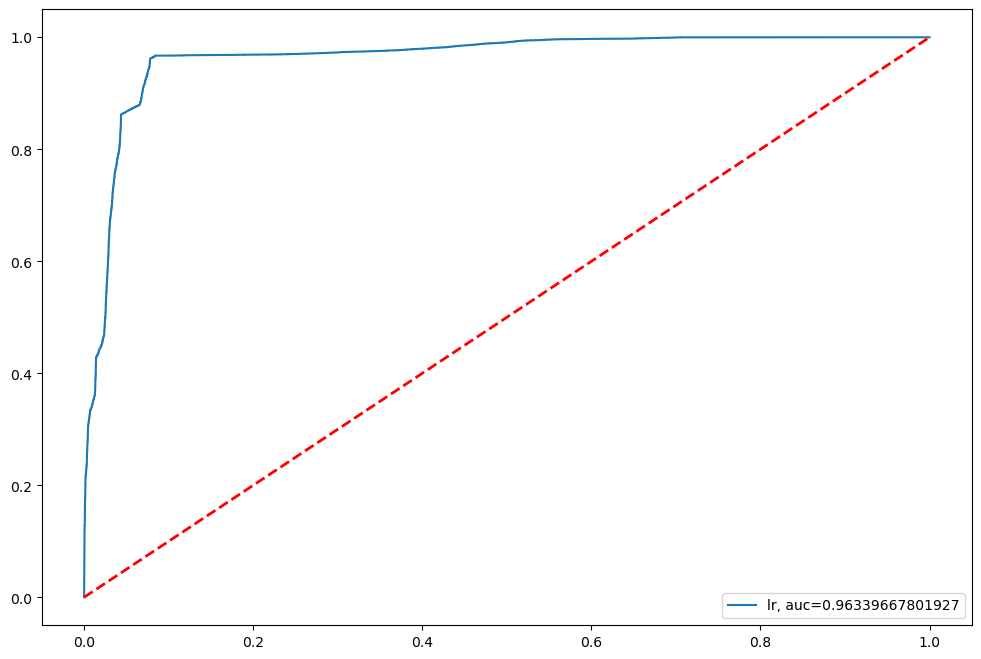

In [72]:
y_pred_prob = lr.predict_proba(teste_x)[::,1]
fpr, tpr,_ = metrics.roc_curve(teste_y, y_pred_prob)
auc = metrics.roc_auc_score(teste_y, y_pred_prob)

plt.rcParams['figure.figsize'] = (12.,8.)
plt.plot(fpr, tpr, label = "lr, auc="+ str(auc))
plt.plot([0,1],[0,1], color = 'red', lw=2, linestyle = '--' )
plt.legend(loc=4)

In [73]:
pandas_profiling.ProfileReport(dados_balanced)

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]


## Árvore de Decisão

In [74]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth= 5, random_state=SEED)

dt.fit(treino_x,treino_y)
y_pred = dt.predict(teste_x)

In [75]:
from sklearn import metrics

print("Acurácia:", metrics.accuracy_score(teste_y,y_pred))
print("Precisão:", metrics.precision_score(teste_y,y_pred))
print("Recall:", metrics.recall_score(teste_y,y_pred))
print("F1:", metrics.f1_score(teste_y,y_pred))

Acurácia: 0.9622849711324362
Precisão: 0.9381639982043992
Recall: 0.9897000789265983
F1: 0.9632432017206943


In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline


cm = confusion_matrix(teste_y,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

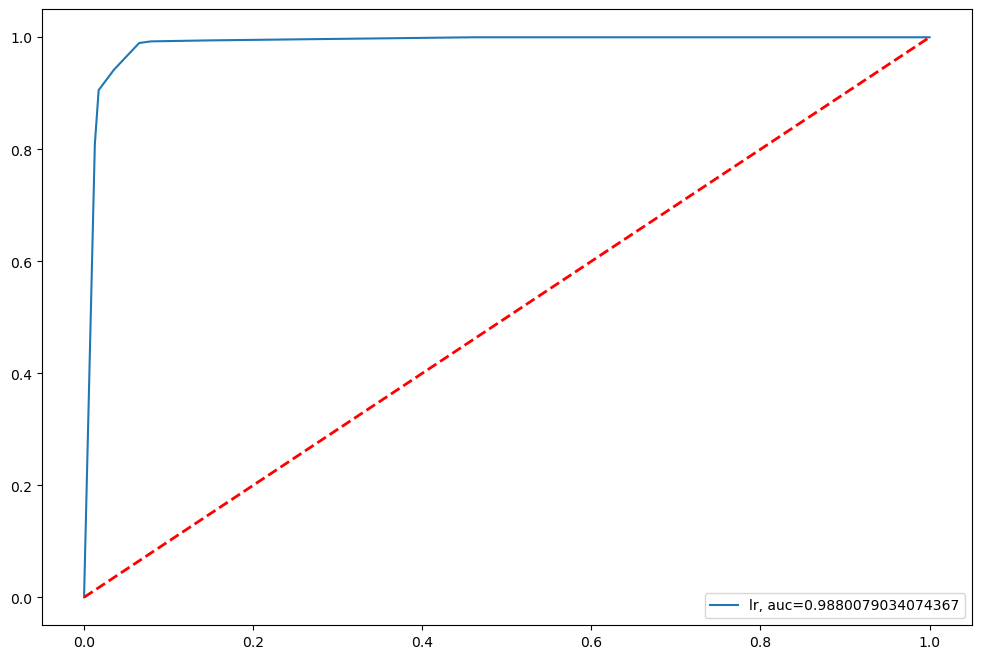

In [80]:
y_pred_prob = dt.predict_proba(teste_x)[::,1]
fpr, tpr,_ = metrics.roc_curve(teste_y, y_pred_prob)
auc = metrics.roc_auc_score(teste_y, y_pred_prob)

plt.rcParams['figure.figsize'] = (12.,8.)
plt.plot(fpr, tpr, label = "lr, auc="+ str(auc))
plt.plot([0,1],[0,1], color = 'red', lw=2, linestyle = '--' )
plt.legend(loc=4)

## RandomForest

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth= 5, random_state= SEED)

rf.fit(treino_x,treino_y)
y_pred = rf.predict(teste_x)

In [78]:
from sklearn import metrics

print("Acurácia:", metrics.accuracy_score(teste_y,y_pred))
print("Precisão:", metrics.precision_score(teste_y,y_pred))
print("Recall:", metrics.recall_score(teste_y,y_pred))
print("F1:", metrics.f1_score(teste_y,y_pred))

Acurácia: 0.9723738398786183
Precisão: 0.9705165500432424
Recall: 0.9742699289660616
F1: 0.9723896175509079


In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline


cm = confusion_matrix(teste_y,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

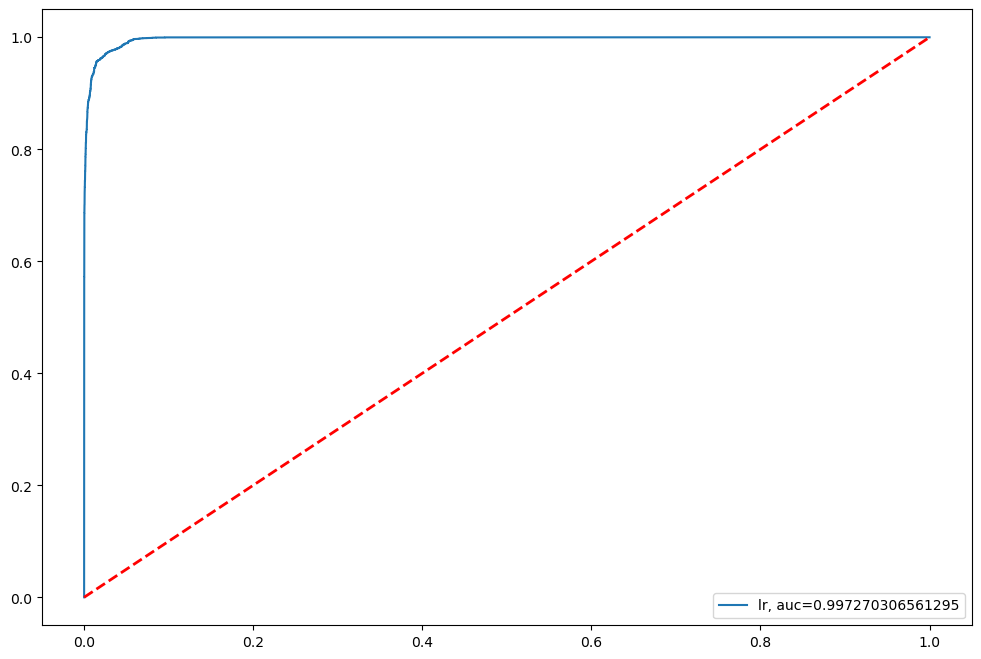

In [81]:
y_pred_prob = rf.predict_proba(teste_x)[::,1]
fpr, tpr,_ = metrics.roc_curve(teste_y, y_pred_prob)
auc = metrics.roc_auc_score(teste_y, y_pred_prob)

plt.rcParams['figure.figsize'] = (12.,8.)
plt.plot(fpr, tpr, label = "lr, auc="+ str(auc))
plt.plot([0,1],[0,1], color = 'red', lw=2, linestyle = '--' )
plt.legend(loc=4)

## Escolhendo o Modelo

In [82]:
classifiers = [
    LogisticRegression(max_iter=1000, random_state=SEED),
    DecisionTreeClassifier(max_depth = 5, random_state=SEED),
    RandomForestClassifier(max_depth= 5, random_state = SEED)]

LogisticRegression
****Resultados****
Acurácia: 0.9417722516699837
Precisão: 0.9241993556945234
Recall: 0.9623125493291239
F1: 0.9428709521507975
DecisionTreeClassifier
****Resultados****
Acurácia: 0.9622849711324362
Precisão: 0.9381639982043992
Recall: 0.9897000789265983
F1: 0.9632432017206943
RandomForestClassifier
****Resultados****
Acurácia: 0.9723738398786183
Precisão: 0.9705165500432424
Recall: 0.9742699289660616
F1: 0.9723896175509079


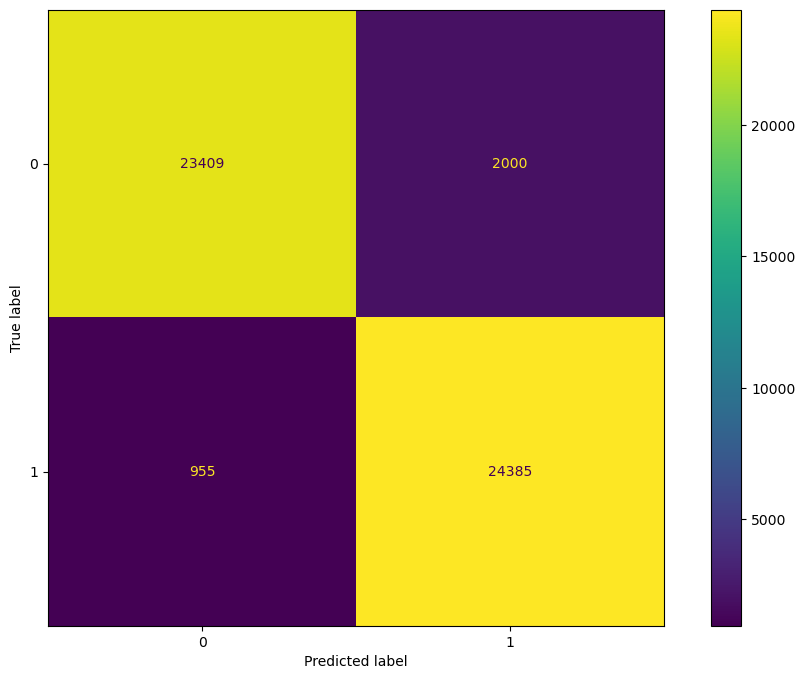

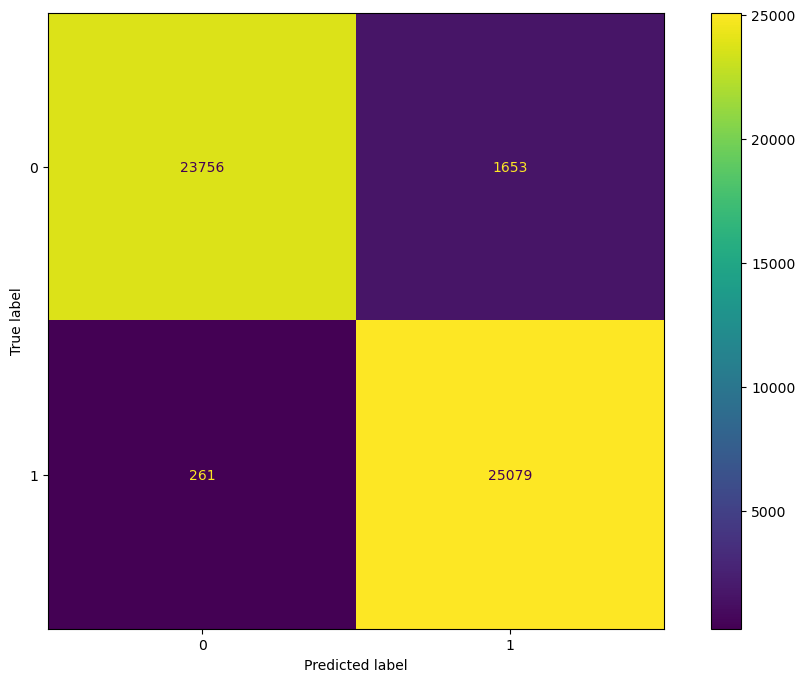

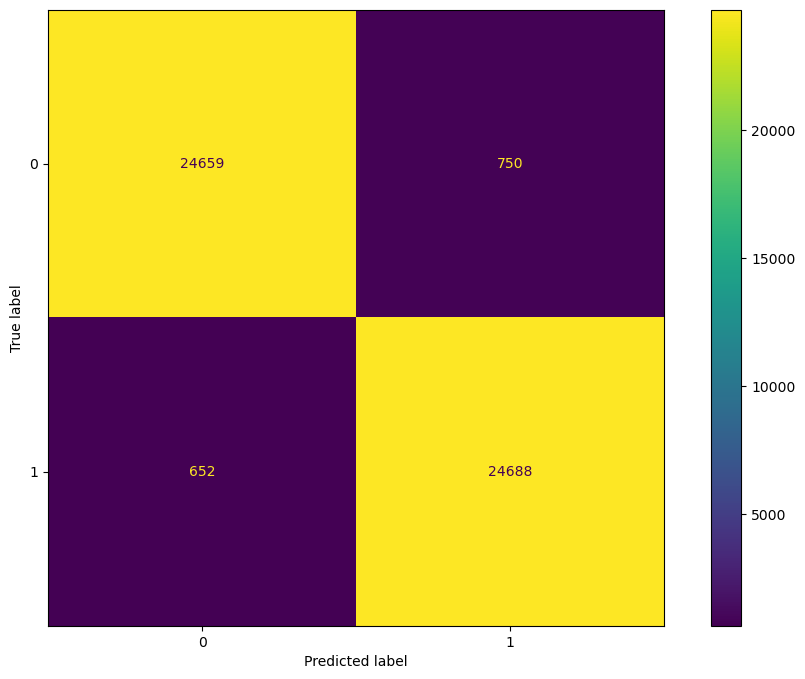

In [85]:
for clf in classifiers:
  clf.fit(treino_x, treino_y)
  name = clf.__class__.__name__
  print("="*30)
  print(name)
  print('****Resultados****')
  y_pred = clf.predict(teste_x)
  print("Acurácia:", metrics.accuracy_score(teste_y, y_pred))
  print("Precisão:", metrics.precision_score(teste_y, y_pred))
  print("Recall:", metrics.recall_score(teste_y, y_pred))
  print("F1:", metrics.f1_score(teste_y, y_pred))

  cm = confusion_matrix(teste_y, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()


## Melhorando o Modelo

In [86]:
n_estimators = np.arange(20, 200, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(2, 10, step=1))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [87]:
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [88]:
from sklearn.model_selection import RandomizedSearchCV

SEED = 70

rforest = RandomForestClassifier(random_state=SEED)

In [89]:
random_cv = RandomizedSearchCV(
    rforest, param_grid, n_iter=5, cv=3, scoring="recall", n_jobs=-1, random_state = SEED
)

In [90]:
%%time
rcv = random_cv.fit(x, y)

CPU times: total: 20.7 s
Wall time: 1min 53s


In [91]:
pd.DataFrame(rcv.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      65.659036      5.818680         1.896493        0.369487   
1      23.949982      0.578430         1.427485        0.149649   
2      25.515664      1.120949         0.596728        0.042646   
3      47.956577      3.838635         1.207733        0.347049   
4      27.515958      3.536406         1.262990        0.553805   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                120                       4                      2   
1                120                       4                      2   
2                 40                       8                      1   
3                100                       8                      4   
4                160                       6                      2   

  param_max_features param_max_depth param_criterion param_bootstrap  \
0               auto               9            gini           False   
1               auto               2            gini           False   
2               sqrt               7         entropy           False   
3               log2               9         entropy            True   
4               log2               2            gini           False   

                                              params  split0_test_score  \
0  {'n_estimators': 120, 'min_samples_split': 4, ...           0.991665   
1  {'n_estimators': 120, 'min_samples_split': 4, ...           0.914223   
2  {'n_estimators': 40, 'min_samples_split': 8, '...           0.980285   
3  {'n_estimators': 100, 'min_samples_split': 8, ...           0.993497   
4  {'n_estimators': 160, 'min_samples_split': 6, ...           0.914223   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999438           0.992817         0.994640        0.003425   
1           0.936009           0.862704         0.904312        0.030736   
2           1.000000           0.973812         0.984699        0.011138   
3           0.999025           0.992226         0.994916        0.002951   
4           0.943487           0.876537         0.911416        0.027404   

   rank_test_score  
0                2  
1                5  
2                3  
3                1  
4                4

In [92]:
rcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'entropy',
 'bootstrap': True}

## Resultados Finais

In [93]:
rfn = RandomForestClassifier(**rcv.best_params_, random_state = SEED)

model = rfn.fit(treino_x, treino_y)
y_pred = rfn.predict(teste_x)

In [95]:
print("Acurácia:",metrics.accuracy_score(teste_y, y_pred))
print("Precisão:",metrics.precision_score(teste_y, y_pred))
print("Recall:",metrics.recall_score(teste_y, y_pred)) 
print("F1:",metrics.f1_score(teste_y, y_pred))

Acurácia: 0.9915860411042582
Precisão: 0.9906258615936036
Recall: 0.9925414364640884
F1: 0.9915827238857459


In [97]:
cm = confusion_matrix(teste_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()